In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv("ObesityDataSet.csv")

In [3]:
df.shape

(2111, 17)

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lb = LabelEncoder()

In [8]:
columns = [0,4,5,8,9,11,14,15,16]

In [9]:
for i in columns:
    df.iloc[:,i] = lb.fit_transform(df.iloc[:,i])

C:\Users\hp\AppData\Local\Temp\ipykernel_2516\1323170981.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,i] = lb.fit_transform(df.iloc[:,i])
C:\Users\hp\AppData\Local\Temp\ipykernel_2516\1323170981.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,i] = lb.fit_transform(df.iloc[:,i])
C:\Users\hp\AppData\Local\Temp\ipykernel_2516\1323170981.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, 

In [10]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [11]:
df = pd.DataFrame(df)

In [12]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [13]:
from sklearn.cluster import KMeans

In [14]:
wcc = []
for i in range(1,15):
    km = KMeans(n_clusters = i)
    km.fit_predict(df)
    wcc.append(km.inertia_)
    wcc

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

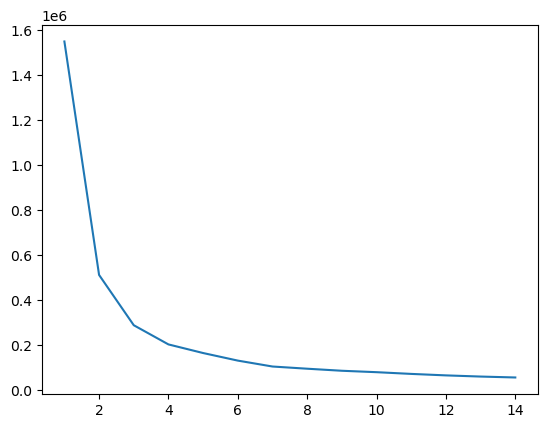

In [15]:
wcc
plt.plot(range(1,15),wcc)
plt.show()

In [16]:
x = df.iloc[:,:].values


In [17]:
agg = AgglomerativeClustering(n_clusters = 4)
y = agg.fit_predict(df)

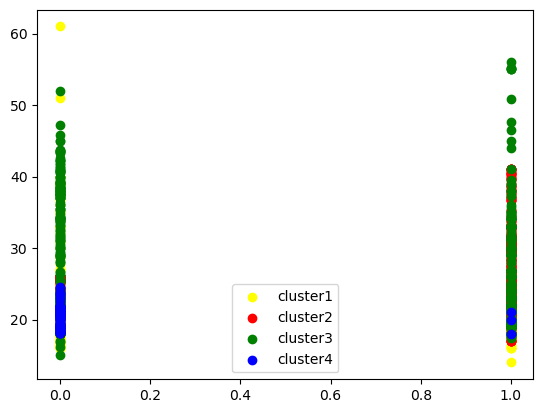

In [18]:
plt.scatter(x[y ==0,0],x[y ==0,1], label = 'cluster1',c = 'yellow')
plt.scatter(x[y ==1,0],x[y ==1,1], label = 'cluster2',c = 'red')
plt.scatter(x[y ==2,0],x[y ==2,1], label = 'cluster3' , c = 'green')
plt.scatter(x[y ==3,0],x[y ==3,1], label = 'cluster4' , c = 'blue')
plt.legend()
plt.show()

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components= 10)

In [21]:
pc_df = pca.fit_transform(df)

In [22]:
pc_df = pd.DataFrame(pc_df)

In [23]:
pc_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-22.780116,-2.252536,-1.120113,0.708997,-0.727263,-0.582391,0.369272,-0.290258,-0.049802,-0.842921
1,-30.757134,-1.868048,-1.080322,-0.186861,2.074391,0.223923,-1.343718,-0.627424,-0.218703,0.111863
2,-9.692360,-1.002664,-1.666775,0.169293,1.076800,-0.075371,0.422495,-0.255307,0.338150,1.288797
3,0.612078,2.522080,1.852308,1.222344,1.888475,-0.385481,-0.794818,0.092572,0.484517,1.272608
4,3.164828,-2.331628,3.210523,0.668645,-0.997859,1.148446,-0.295936,-0.164028,0.929757,0.354731


In [24]:
s = pc_df.iloc[:,:].values

In [25]:
agg = AgglomerativeClustering(n_clusters = 4)
y = agg.fit_predict(pc_df)

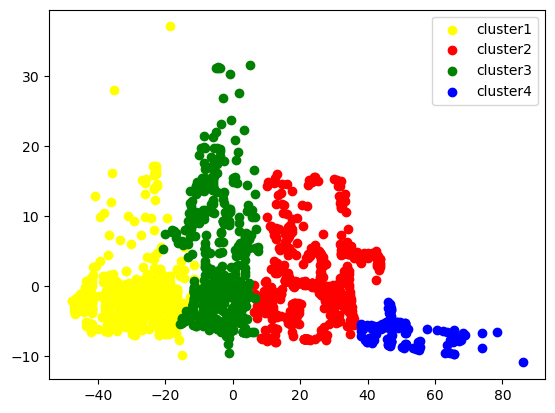

In [26]:
plt.scatter(s[y ==0,0],s[y ==0,1], label = 'cluster1',c = 'yellow')
plt.scatter(s[y ==1,0],s[y ==1,1], label = 'cluster2',c = 'red')
plt.scatter(s[y ==2,0],s[y ==2,1], label = 'cluster3' , c = 'green')
plt.scatter(s[y ==3,0],s[y ==3,1], label = 'cluster4' , c = 'blue')
plt.legend()
plt.show()

In [27]:
db = DBSCAN(eps = 0.2 , min_samples = 3)

In [28]:
y = db.fit_predict(pc_df)

In [29]:
d = pc_df.iloc[:,:].values

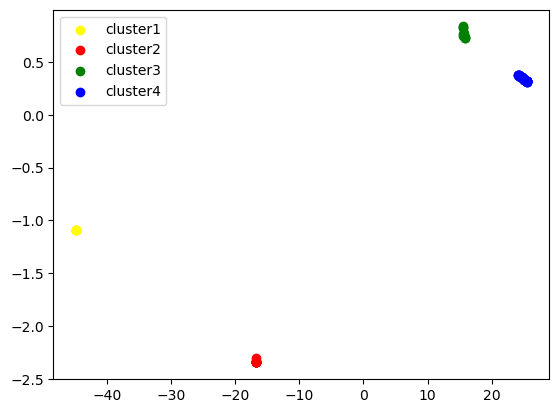

In [30]:
plt.scatter(d[y ==0,0],d[y ==0,1], label = 'cluster1',c = 'yellow')
plt.scatter(d[y ==1,0],d[y ==1,1], label = 'cluster2',c = 'red')
plt.scatter(d[y ==2,0],d[y ==2,1], label = 'cluster3' , c = 'green')
plt.scatter(d[y ==3,0],d[y ==3,1], label = 'cluster4' , c = 'blue')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
label_db = db.labels_
acc_db = silhouette_score(df,label_db)

In [33]:
print(acc_db)

-0.6234937523506617


In [34]:
label_agg = agg.labels_
acc_agg = silhouette_score(df,label_agg)

In [35]:
print(acc_agg)

0.4644104565091822


In [36]:
model = ['DBSCAN','AgglomerativeClustering']

In [37]:
accuracy = [acc_db,acc_agg]

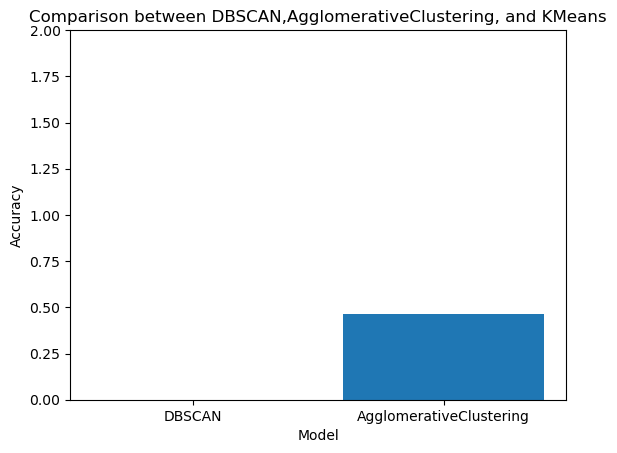

In [38]:
plt.bar(model, accuracy)
plt.ylim(0, 2)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison between DBSCAN,AgglomerativeClustering, and KMeans")
plt.show()

In [39]:
km = KMeans(n_clusters = 4)

In [40]:
k = km.fit_predict(pc_df)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
label_km = km.labels_

In [42]:
km_acc = silhouette_score(df,label_km)

In [43]:
print(km_acc)

0.4681528298798224


In [44]:
iso = IsolationForest()

In [45]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
# model.fit(df[['salary']])

In [46]:
f =  model.fit_predict(pc_df)

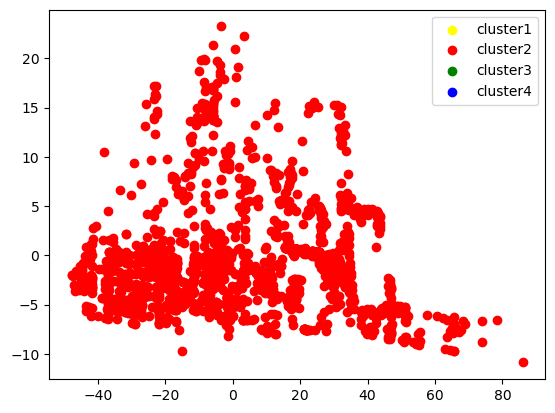

In [47]:
plt.scatter(s[f ==0,0],s[f ==0,1], label = 'cluster1',c = 'yellow')
plt.scatter(s[f ==1,0],s[f ==1,1], label = 'cluster2',c = 'red')
plt.scatter(s[f ==2,0],s[f ==2,1], label = 'cluster3' , c = 'green')
plt.scatter(s[f ==3,0],s[f ==3,1], label = 'cluster4' , c = 'blue')
plt.legend()
plt.show()

In [48]:
outlier = []
def outlier_detect(s):
    threshold = 3
    mean = np.mean(s)
    std = np.std(s)
    
    
    for i in s:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

In [52]:
outlier_pc = outlier_detect(pc_df)

C:\Users\hp\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [53]:
print(outlier_pc)

NameError: name 'outlier_pc' is not defined